# Dissected Data Visualization and Statistics

⚠️ The input of this notebook corresponds to the output of `data_exploration_cleaning/dissected_balancing`. So in order to work with the data up to date, after extraction, execute said notebook.

## Libraries and Configurations

Import configuration files

In [1]:
from configparser import ConfigParser

config = ConfigParser()
config.read("../../config.ini")

['../../config.ini']

Import **data libraries**

In [2]:
import pandas as pd

Import **other libraries**

In [3]:
from rich.progress import Progress
from rich import traceback

traceback.install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7cfbbe0ded50>>

Custom helper scripts

In [4]:
%cd ../../
from scripts import plotHelper, encodingHelper
%cd data_exploration_cleaning/dissected

/home/bacci/COMPACT/notebooks
/home/bacci/COMPACT/notebooks/data_exploration_cleaning/dissected


## Import Data

In [7]:
# Combined dataframe
std_dissected_csv = (
    config["DEFAULT"]["interim_path"] + "dissected/std_dissected_df_raw.csv"
)

In [8]:
df = pd.read_csv(std_dissected_csv, index_col=0)

In [9]:
df

,MAC Address,Channel,DS Channel,Vendor Specific Tags,Length,Label,Supported Rates 1,Supported Rates 2,Supported Rates 3,Supported Rates 4,...,TIM_Broadcast,BSS_Transition,Multiple_BSSID,Timing_Measurement,SSID_List,DMS,Interworking,QoS_Map,WNM_Notification,Operating_Mode_Notification
0,1a:e6:5a:fe:34:4c,1,1.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1a:e6:5a:fe:34:4c,1,1.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1a:e6:5a:fe:34:4c,11,1.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1a:e6:5a:fe:34:4c,1,2.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,1a:e6:5a:fe:34:4c,11,2.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,da:a1:19:00:17:f9,6,1.0,0050f208002400,182,XiaomiRedmiNote7_S,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
13940,da:a1:19:1a:cc:8f,6,8.0,0050f208002400,182,XiaomiRedmiNote7_S,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
13941,da:a1:19:41:c9:b1,11,5.0,0050f208002400,143,XiaomiRedmiNote7_S,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
13942,da:a1:19:c7:24:b1,1,3.0,0050f208002400,182,XiaomiRedmiNote7_S,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


## Data Visualization

### Label Distribution

Let's check the Label distribution, the order of magnitude of the number of Probe Requests per single device should not differ much.

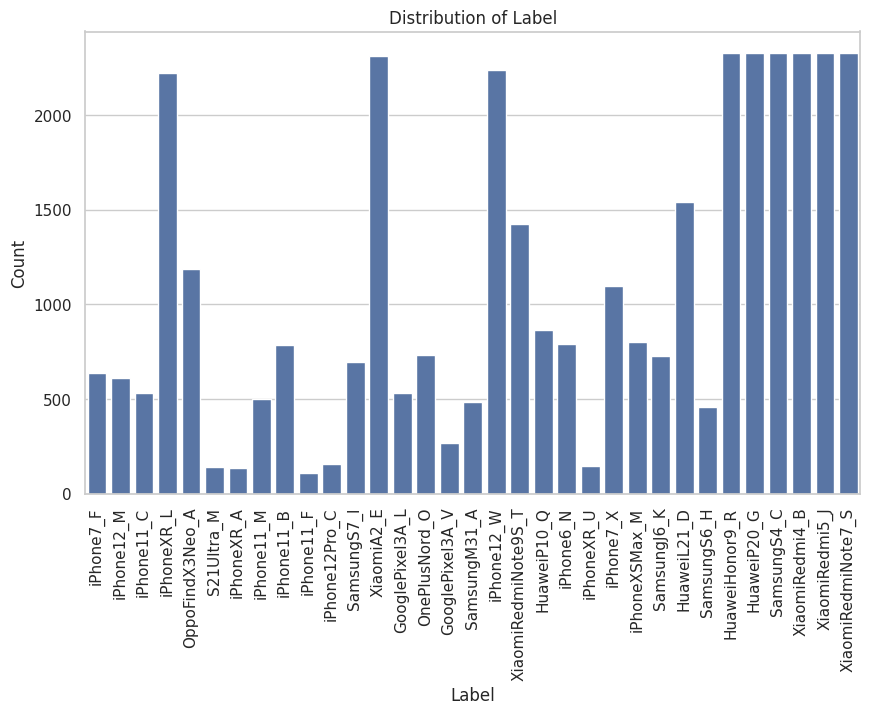

In [10]:
plotHelper.plot_label_distribution(df, "Label")

### Features - General View

Let's check how many features we must deal with, not considering `Label` and `MAC Address`

In [14]:
print("Number of features:", df.shape[1] - 2)

Number of features: 44


In [11]:
for column in df.columns:
    print(column)

MAC Address
Channel
DS Channel
Vendor Specific Tags
Length
Label
Supported Rates 1
Supported Rates 2
Supported Rates 3
Supported Rates 4
Extended Supported Rates 1
Extended Supported Rates 2
Extended Supported Rates 3
Extended Supported Rates 4
Forty_Mhz_Intolerant
DSSS_CCK
Max_A_MSDU
Rx_STBC
Tx_STBC
Short_GI_40Mhz
SM_Power_Save
Supported_Channel_Width
LDPC_Coding_Capability
Min_MPDCU_Start_Spacing
Max_A_MPDU_Length_Exponent
RX_Highest_Supported_Data_Rate
RX_MSC_Bitmask
RD_Responder
HTC_HT_Support
MCS_Feedback
Compressed_Steering_n_Beamformer_Antennas_Supported
20_40_BSS_Coexistence_Management_Support
Extended_Channel_Switching
FMS
TFS
WNM_Sleep_Mode
TIM_Broadcast
BSS_Transition
Multiple_BSSID
Timing_Measurement
SSID_List
DMS
Interworking
QoS_Map
WNM_Notification
Operating_Mode_Notification


## Supported Rates

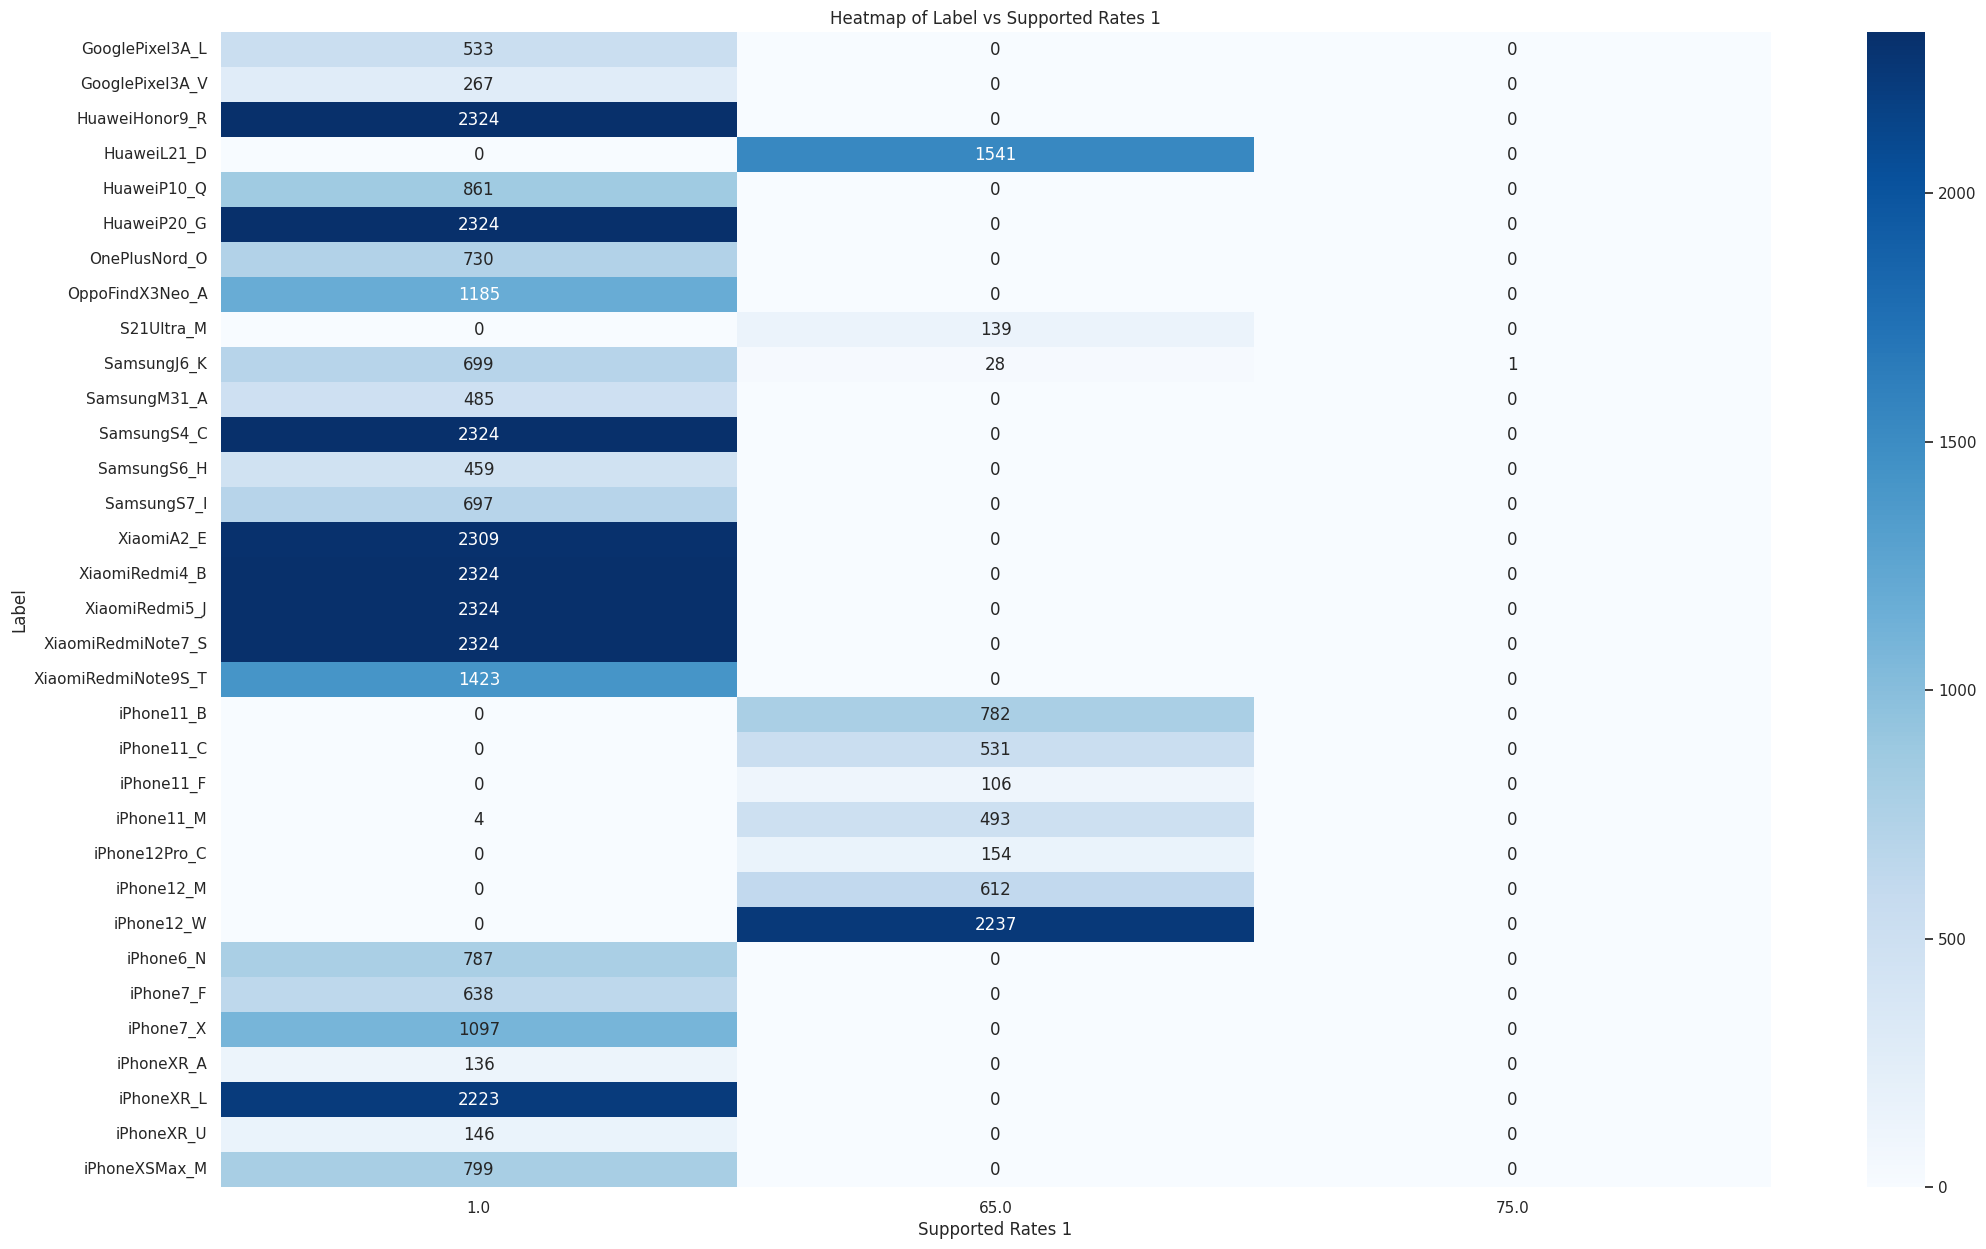

In [15]:
plotHelper.plot_heatmap(df, "Label", "Supported Rates 1")

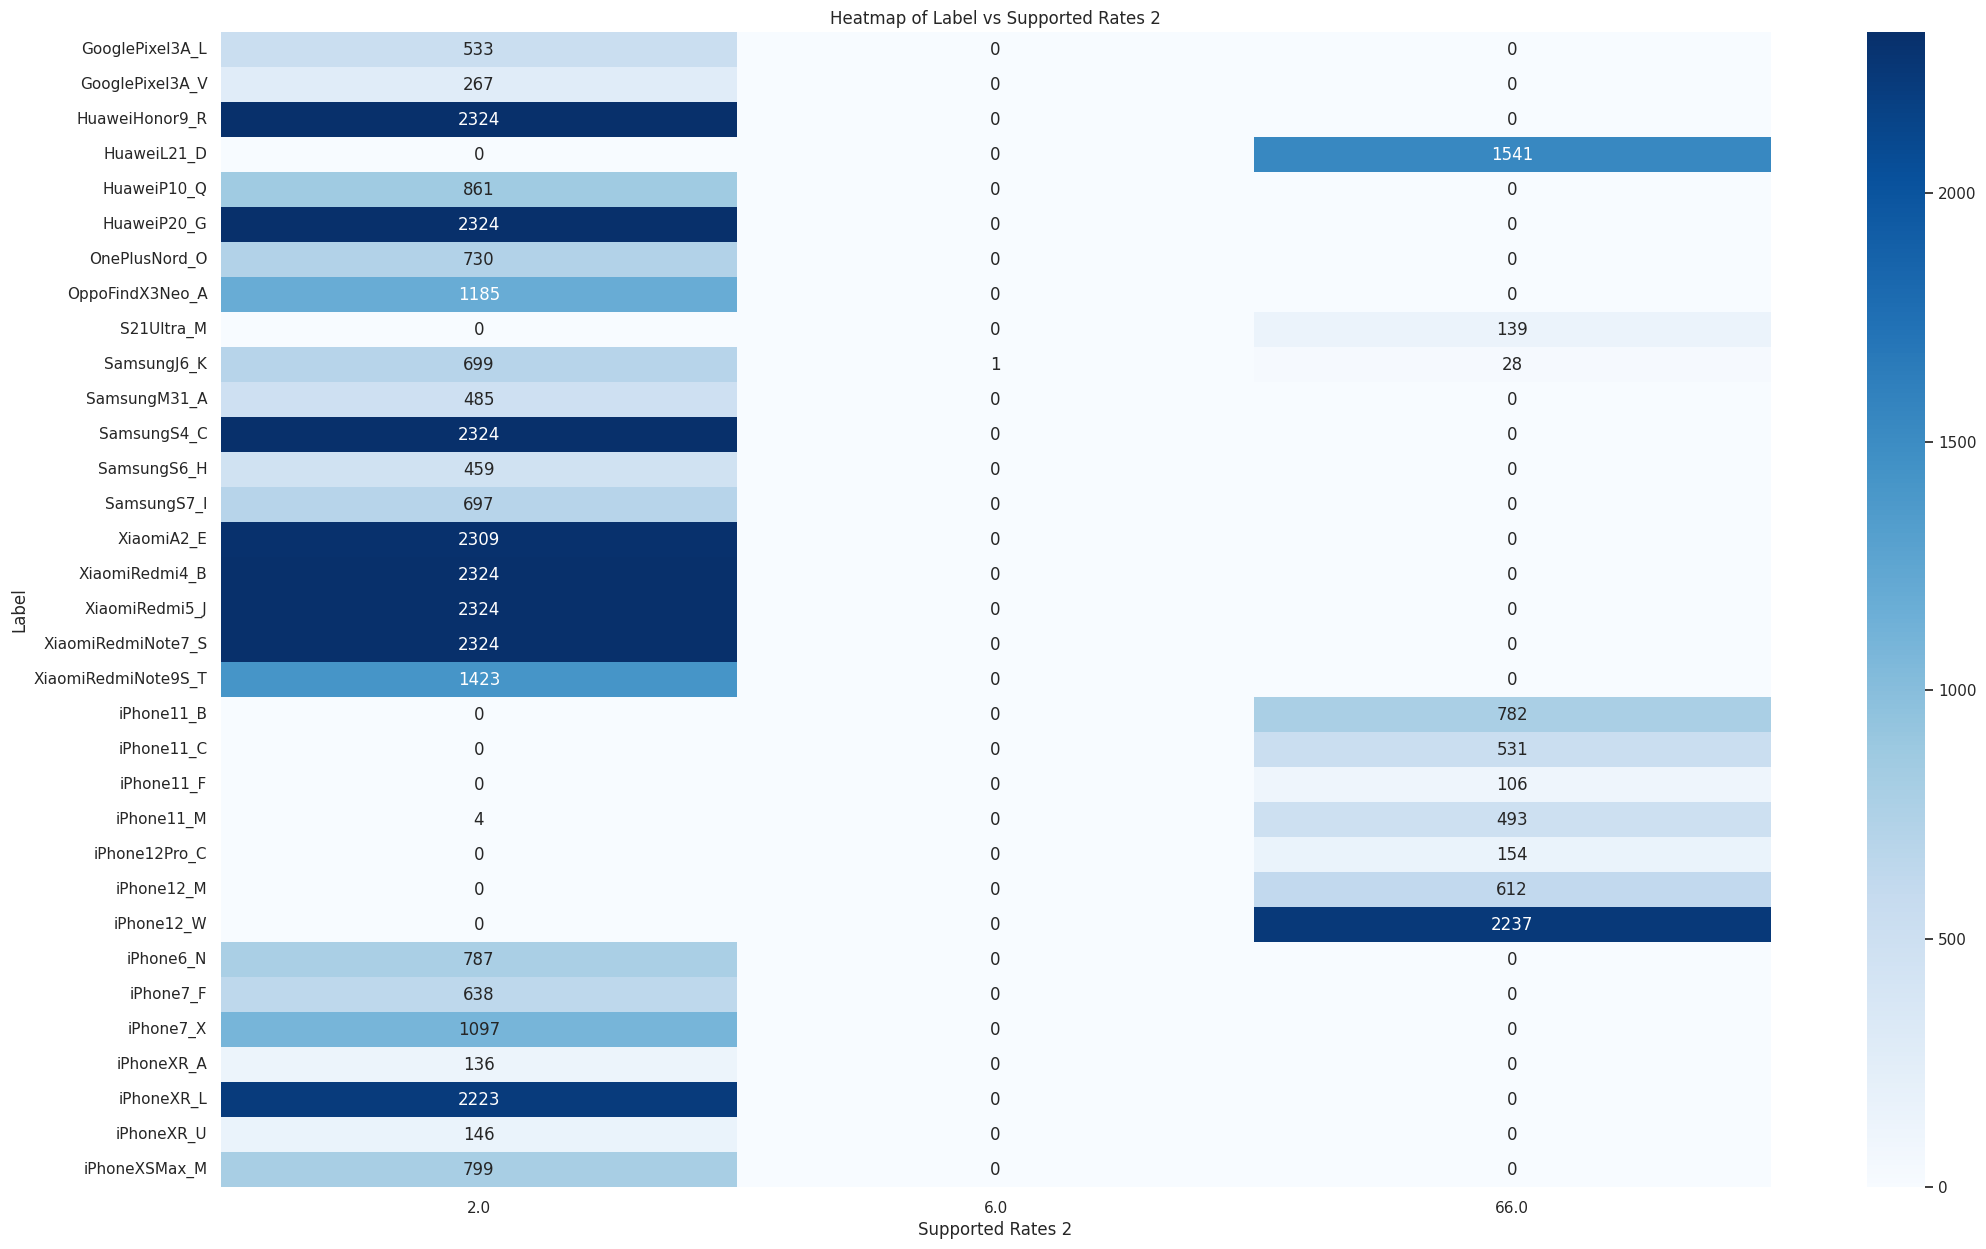

In [16]:
plotHelper.plot_heatmap(df, "Label", "Supported Rates 2")

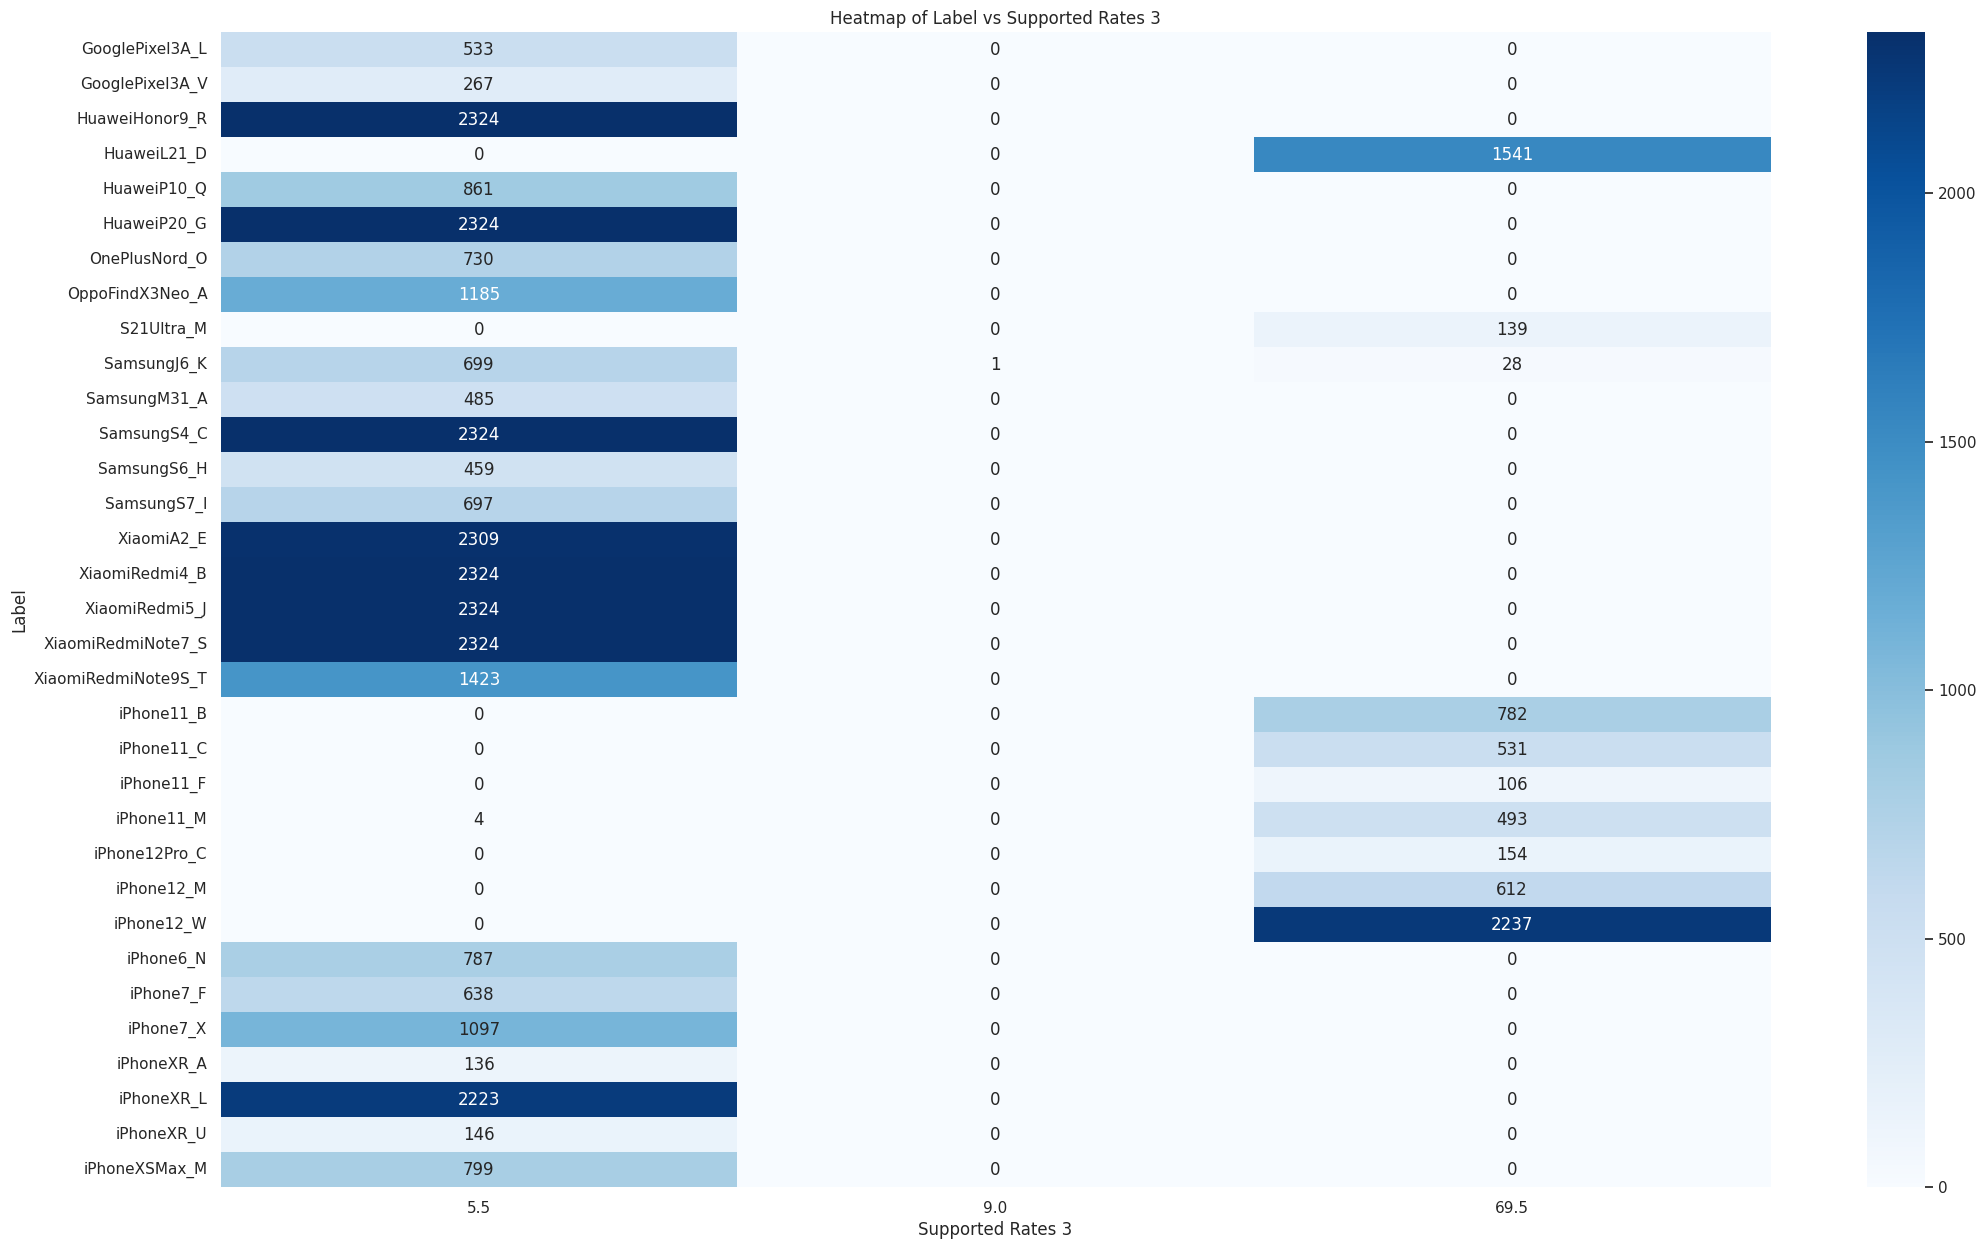

In [17]:
plotHelper.plot_heatmap(df, "Label", "Supported Rates 3")

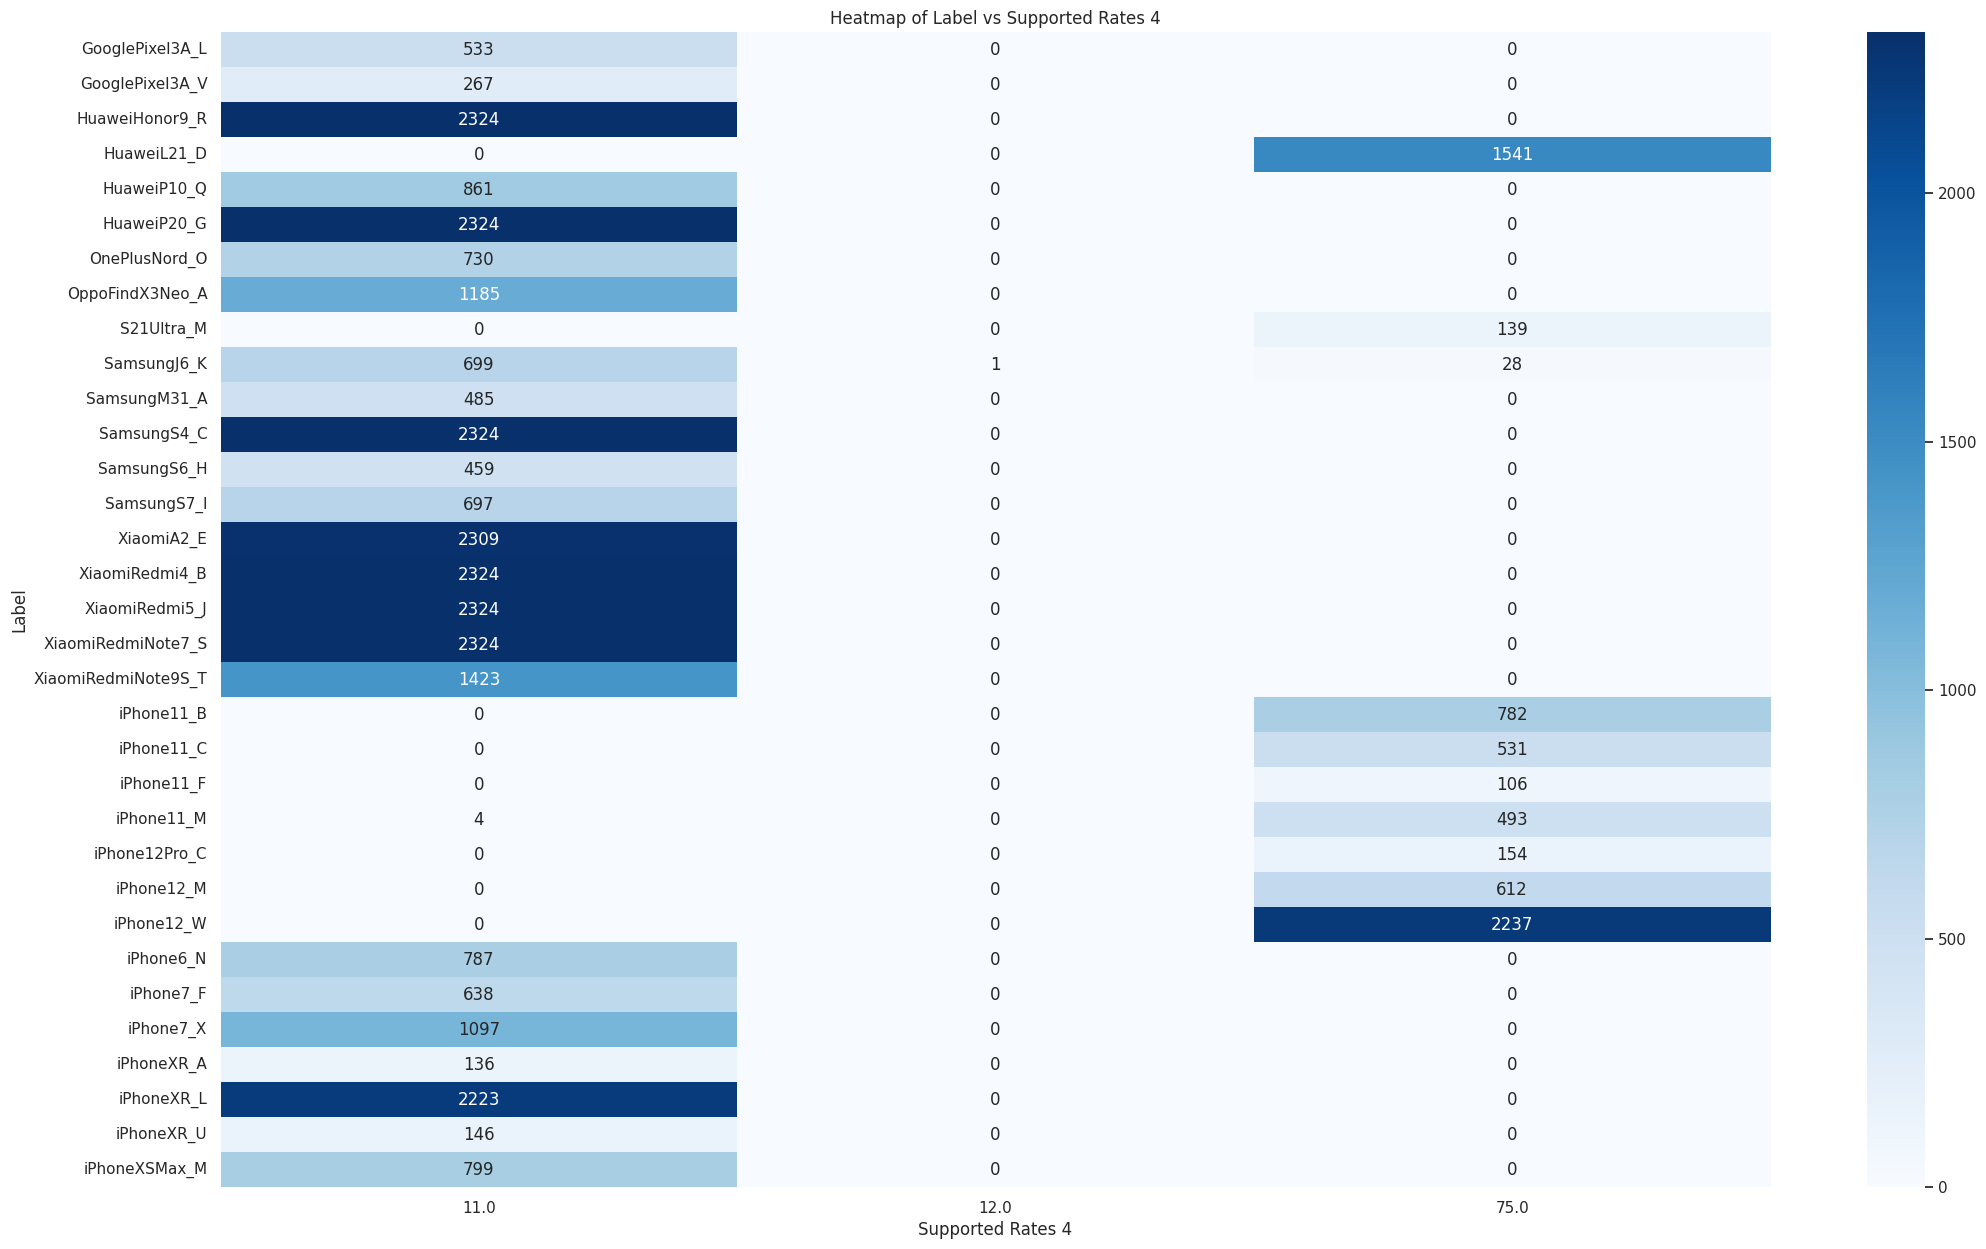

In [18]:
plotHelper.plot_heatmap(df, "Label", "Supported Rates 4")